<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/NonLinearEqns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The relaxation method

In [ ]:
import numpy as np

def f(x):
    return 2-np.exp(-x)

def f2(x):
    return np.exp(1-x**2)

# relaxation method
def relaxation(f, x, tolerance):
    error = 999.
    iterations = 0

    # here the code will stop after 20 iterations since f2 will not converge
    while error > tolerance and iterations < 20:
        tmp = x
        x = f(x)
        error = np.abs(tmp-x)
        iterations += 1
        print("x=", tmp, " new x=", x, " diff=", error)

if __name__=="__main__":
    x= 0.5
    print("for the first function x=2-e^(-x):")
    relaxation(f, x, 10**-9)
    print("\n")
    print("for the second function x=e^(1-x**2):")
    relaxation(f2, x, 1e-2)

for the first function x=2-e^(-x):
x= 0.5  new x= 1.3934693402873666  diff= 0.8934693402873666
x= 1.3934693402873666  new x= 1.751787325113973  diff= 0.3583179848266065
x= 1.751787325113973  new x= 1.8265363696849992  diff= 0.07474904457102616
x= 1.8265363696849992  new x= 1.8390298555971287  diff= 0.01249348591212951
x= 1.8390298555971287  new x= 1.841028423293983  diff= 0.0019985676968543586
x= 1.841028423293983  new x= 1.8413458214753817  diff= 0.0003173981813986426
x= 1.8413458214753817  new x= 1.8413961700324237  diff= 5.0348557042001474e-05
x= 1.8413961700324237  new x= 1.8414041553053788  diff= 7.985272955091105e-06
x= 1.8414041553053788  new x= 1.8414054217314317  diff= 1.2664260529149374e-06
x= 1.8414054217314317  new x= 1.8414056225796105  diff= 2.0084817875520855e-07
x= 1.8414056225796105  new x= 1.841405654432999  diff= 3.185338859346132e-08
x= 1.841405654432999  new x= 1.8414056594847663  diff= 5.051767226760262e-09
x= 1.8414056594847663  new x= 1.841405660285948  diff= 8.

**Overrelaxation**

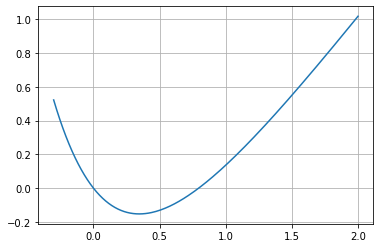

Initial x =  0.5
x =  0.7175464361494597
x =  0.7619067492797049
x =  0.7821205821947897
x =  0.7907532631816485
x =  0.794334975085306
x =  0.7958029765851733
x =  0.7964016204183796
x =  0.7966452403764663
x =  0.7967442987979305
x =  0.7967845631871013
x =  0.7968009272190715
x =  0.7968075774224933
x =  0.7968102799464087
x =  0.7968113781935964
x =  0.7968118244957711
x =  0.7968120058623394
x =  0.7968120795653444
x =  0.7968121095164629
x =  0.7968121216878716
number of iterations =  19
Root using the relaxation method:  0.7968121216878716


Initial x =  0.5
x =  0.7961614102653574
x =  0.7968371043123295
x =  0.7968111595136407
x =  0.7968121677162006
x =  0.7968121285558069
For omega =  0.75 number of iterations =  5
Root using the overrelaxation method:  0.7968121285558069


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
accuracy = 10**-8

def f(x, c):
    return 1 - np.exp(- c * x)

def f_prime(x, c):
        return c * np.exp(- c * x)

def relaxation_error(x1, x2, c):
    return (x1 - x2) / (1 - 1 / f_prime(x1, c))

def overrelaxation_error(x1, x2, c, omega):
    return (x1 - x2) / (1 - 1 / ((1 + omega) * f_prime(x1, c) - omega))

def eqn(x, c):
    return x - 1 + np.exp(- c * x)

####################################
# the relaxation method
####################################
def relaxation(c):
    iterations = 0

    x1 = 0.5 # starting value
    x2 = f(x1, c)
    print("Initial x = ", x1)
    while(abs(relaxation_error(x1, x2, c)) > accuracy):
        x1 = x2 
        x2 = f(x1, c)
        iterations += 1
        print("x = ", x2)

    print('number of iterations = ', iterations)
    return x2

####################################
# the overlaxation method
####################################
def overrelaxation(c, omega):
    iterations = 0

    x1 = 0.5  # starting value
    x2 = (1 + omega) * f(x1, c) - omega * x1
    print("Initial x = ", x1)

    while abs(overrelaxation_error(x1, x2, c, omega)) > accuracy:
        x1 = x2 
        x2 = (1 + omega) * f(x1, c) - omega * x1
        iterations += 1
        print("x = ", x2)
    print('For omega = ', omega,'number of iterations = ', iterations)
    return x2

x = np.linspace(-0.3, 2, 200)
y = eqn(x, 2)
plt.plot(x, y)
plt.grid()
plt.show()

# relaxation method
print("Root using the relaxation method: ", relaxation(2))
print("\n")

# overrelaxation method
print("Root using the overrelaxation method: ", overrelaxation(2, 0.75))

# We might want to use an omega < 0 if at each iteration the function overshoots the solution, i.e., we start at x=2
# and the next iteration gives x=3, but the solution is 2.5

**Iterative method to solve linear equations**

$3x_1 - 0.1x_2 - 0.2x_3 = 7.85$ \\
$0.1x_1 + 7x_2 - 0.3x_3 = -19.3$ \\
$0.3x_1-0.2x_2+10x_3 = 71.4$

which means:

$x_1 = (7.85+0.1x_2+0.2x_3)/3$ \\
$x_2 = (-19.3-0.1x_1+0.3x_3)/7$ \\
$x_3 = (71.4-0.3x_1+0.2x_2)/10$


In [ ]:
import numpy as np

def x1(y ,z):
    return (7.85+0.1*y+0.2*z)/3

def x2(x, z):
    return (-19.3-0.1*x+0.3*z)/7

def x3(x, y):
    return (71.4-0.3*x+0.2*y)/10

if __name__=="__main__":
    x, y, z = 0., 0., 0.

    for i in range(10):
        x = x1(y, z)
        y = x2(x, z)
        z = x3(x, y)
        print("x1: ", x, " x2: ", y, " x3: ", z)

    print("x1 = ", x)
    print("x2 = ", y)
    print("x3 = ", z)

x1:  2.6166666666666667  x2:  -2.7945238095238096  x3:  7.005609523809525
x1:  2.990556507936508  x2:  -2.499624684807256  x3:  7.00029081106576
x1:  3.0000318979108087  x2:  -2.499987992353051  x3:  6.999999283215615
x1:  3.000000352469273  x2:  -2.5000000357546064  x3:  6.99999998871083
x1:  2.9999999980555683  x2:  -2.500000000456044  x3:  7.000000000049214
x1:  2.9999999999880793  x2:  -2.4999999999977205  x3:  7.000000000000403
x1:  3.000000000000103  x2:  -2.4999999999999845  x3:  6.999999999999997
x1:  3.0  x2:  -2.5000000000000004  x3:  7.0
x1:  3.0  x2:  -2.5  x3:  7.0
x1:  3.0  x2:  -2.5  x3:  7.0
x1 =  3.0
x2 =  -2.5
x3 =  7.0


# Bisection method

x1 =  1.0  x2 =  2.0
x1 =  1.5  x2 =  2.0
x1 =  1.5  x2 =  1.75
x1 =  1.5  x2 =  1.625
x1 =  1.5625  x2 =  1.625
x1 =  1.5625  x2 =  1.59375
x1 =  1.5625  x2 =  1.578125
x1 =  1.5703125  x2 =  1.578125
x1 =  1.5703125  x2 =  1.57421875
x1 =  1.5703125  x2 =  1.572265625
x1 =  1.5703125  x2 =  1.5712890625
x1 =  1.5703125  x2 =  1.57080078125
x1 =  1.570556640625  x2 =  1.57080078125
x1 =  1.5706787109375  x2 =  1.57080078125
x1 =  1.57073974609375  x2 =  1.57080078125
x1 =  1.570770263671875  x2 =  1.57080078125
x1 =  1.5707855224609375  x2 =  1.57080078125
x1 =  1.5707931518554688  x2 =  1.57080078125
x1 =  1.5707931518554688  x2 =  1.5707969665527344
x1 =  1.5707950592041016  x2 =  1.5707969665527344
x1 =  1.570796012878418  x2 =  1.5707969665527344
x1 =  1.570796012878418  x2 =  1.5707964897155762
x1 =  1.570796251296997  x2 =  1.5707964897155762
x1 =  1.570796251296997  x2 =  1.5707963705062866
x1 =  1.5707963109016418  x2 =  1.5707963705062866
x1 =  1.5707963109016418  x2 =  1.570

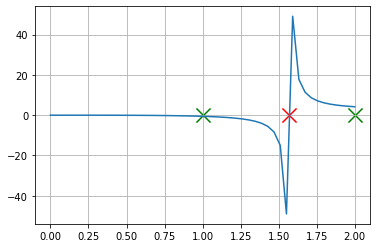

In [ ]:
## module bisection
from math import log,ceil,tan
import numpy as np
import matplotlib.pyplot as plt

#Find all the zeroes of f (x) = x − tan x 
#in the interval (0, 2) by the method of bisection.
def func(x): 
    return x-np.tan(x)

# bisection method and we already have f(x1)*f(x2)<0
def bisection(f, x1, x2, tol=1.0e-9):
    f1 = f(x1)
    if abs(f1)<1.0e-10: return x1
    f2 = f(x2)
    if abs(f2)<1.0e-10: return x2
    if f1*f2 > 0.0: 
        print("Root is not bracketed")

    # The method ceil() returns ceiling value of x, the smallest integer not less than x.
    n = ceil(log(abs(x2 - x1)/tol)/log(2.0))

    for i in range(n):
        print("x1 = ", x1, " x2 = ", x2)
        x3 = 0.5*(x1 + x2)
        f3 = f(x3)

        if abs(f3)<1.0e-10: return x3
        if f2*f3 < 0.0: 
            x1 = x3
            f1 = f3
        else: 
            x2 = x3
            f2 = f3
    return (x1 + x2)/2.0

if __name__=="__main__":
    x1 = 1.
    x2 = 2.
    root = bisection(func, x1, x2)
    print("  root=", root)

    x = np.linspace(0., 2., 50)
    y = func(x)
    plt.plot(x, y)
    plt.scatter(x1, 0., marker='x', s=200, color='green')  # initial value
    plt.scatter(x2, 0., marker='x', s=200, color='green')  # initial value
    plt.scatter(root, 0., marker='x', s=200, color='red')  # plot the root
    plt.grid()
    plt.show()

#Newton's method

x =  2.0
x =  1.625
x =  1.4857859531772575
x =  1.4659559197359893
x =  1.4655713749070918
x =  1.4655712318767877
Found solution after 6 iterations.
Root =  1.4655712318767877
Points used:  [1, 2.0, 1.625, 1.4857859531772575, 1.4659559197359893, 1.4655713749070918, 1.4655712318767877]


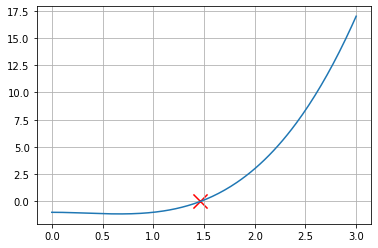

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x**2 - 1

def Df(x):
    return 3*x**2 - 2*x

# Newton's method to find the solution of f(x)=0
def Newton(f, Df, x0, epsilon, max_iter):
    xn = x0
    xlist = []

    for n in range(max_iter):
        xlist.append(xn)

        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after', n, 'iterations.')
            return xn, xlist
        Dfxn = Df(xn)
        
        if abs(Dfxn) < 1e-10:
            print('Zero derivative. No solution found.')
            return None, xlist
        xn = xn - fxn/Dfxn
        print("x = ", xn)
    return None, xlist

if __name__=="__main__":
    solution, xlist = Newton(f, Df, 1, 1e-10, 10)
    print("Root = ", solution)
    print("Points used: ", xlist)

    x = np.linspace(0, 3, 200)
    y = f(x)
    plt.plot(x, y)
    plt.scatter(solution, f(solution), marker='x', s=200, color='red')  # plot the root
    plt.grid()
    plt.show()

**Secant method**

x0= 20.0  x1= 19.0  x= 13.012291483757682
x0= 19.0  x1= 13.012291483757682  x= 10.206277785522822
x0= 13.012291483757682  x1= 10.206277785522822  x= 7.629554508158437
x0= 10.206277785522822  x1= 7.629554508158437  x= 5.833699661144017
x0= 7.629554508158437  x1= 5.833699661144017  x= 4.454371817761728
x0= 5.833699661144017  x1= 4.454371817761728  x= 3.446493365806835
x0= 4.454371817761728  x1= 3.446493365806835  x= 2.7133160797086835
x0= 3.446493365806835  x1= 2.7133160797086835  x= 2.20379752062199
x0= 2.7133160797086835  x1= 2.20379752062199  x= 1.8768740013996337
x0= 2.20379752062199  x1= 1.8768740013996337  x= 1.7002004661963386
x0= 1.8768740013996337  x1= 1.7002004661963386  x= 1.6325636591965662
x0= 1.7002004661963386  x1= 1.6325636591965662  x= 1.6189674795403475
x0= 1.6325636591965662  x1= 1.6189674795403475  x= 1.6180451277488552
x0= 1.6189674795403475  x1= 1.6180451277488552  x= 1.6180339973667586
x0= 1.6180451277488552  x1= 1.6180339973667586  x= 1.6180339887499744
Solution= 

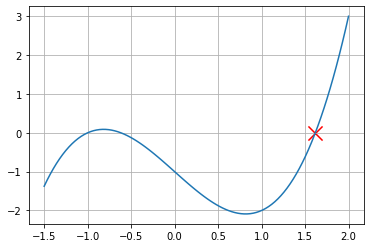

In [ ]:
import sys as sys
import numpy as np
import matplotlib.pylab as plt

# define function
def func(x):
    return x**3 - 2*x - 1

# use the secant method to find the root of equation
def secant(func, x0, x1, tol=1e-9, max_iters=100):
    f_x0 = func(x0)
    f_x1 = func(x1)
    iterations = 0

    while abs(f_x1) > tol and iterations < max_iters:
        try:
            denominator = (f_x1 - f_x0)/(x1 - x0)
            x = x1 - (f_x1)/denominator
            print("x0=", x0, " x1=", x1, " x=", x)
        except ZeroDivisionError:
            print("Denominator is zero for x = ", x)
            sys.exit(1)     # Abort with error
       
        x0, x1 = x1, x
        f_x0, f_x1 = f_x1, func(x1)
        iterations += 1

    # if too many iterations, return x = None
    if abs(f_x1) > tol:
        iterations = -1
        x = None
    return x

if __name__=="__main__":
    x0 = 20.
    x1 = x0 - 1
    solution = secant(func, x0, x1, 1.0e-9)
    print("Solution=", solution)

    x = np.linspace(-1.5, 2., 100)
    y = func(x)
    plt.plot(x, y)
    plt.scatter(solution, func(solution), marker='x', s=200, color='red')  # plot the root
    plt.grid()
    plt.show()

**Search for multiple roots**

The roots are:
  root= 0.0
x1 =  1.5700000000000012  x2 =  1.5800000000000012
x1 =  1.5700000000000012  x2 =  1.575000000000001
x1 =  1.5700000000000012  x2 =  1.5725000000000011
x1 =  1.5700000000000012  x2 =  1.5712500000000011
x1 =  1.570625000000001  x2 =  1.5712500000000011
x1 =  1.570625000000001  x2 =  1.5709375000000012
x1 =  1.5707812500000011  x2 =  1.5709375000000012
x1 =  1.5707812500000011  x2 =  1.5708593750000013
x1 =  1.5707812500000011  x2 =  1.5708203125000013
x1 =  1.5707812500000011  x2 =  1.5708007812500013
x1 =  1.5707910156250011  x2 =  1.5708007812500013
x1 =  1.5707958984375012  x2 =  1.5708007812500013
x1 =  1.5707958984375012  x2 =  1.5707983398437513
x1 =  1.5707958984375012  x2 =  1.5707971191406263
x1 =  1.5707958984375012  x2 =  1.5707965087890639
x1 =  1.5707962036132825  x2 =  1.5707965087890639
x1 =  1.5707962036132825  x2 =  1.570796356201173
x1 =  1.5707962799072277  x2 =  1.570796356201173
x1 =  1.5707963180542004  x2 =  1.570796356201173
x1 =  1.57

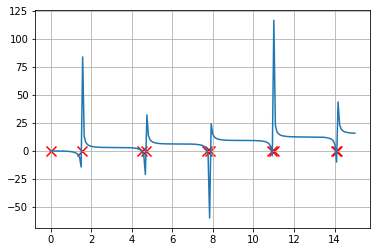

In [ ]:
from math import log,ceil,tan
import numpy as np
import matplotlib.pyplot as plt

#Find all the zeroes of f (x) = x − tan x 
#in the interval (0, 20) by the method of bisection/Sectant
def func(x): 
    return x-np.tan(x)

## module rootsearch
#x1,x2 = rootsearch(func,a,b,dx)
#return x1 and x2 values where func(x1)*func(x2)<0 where x2=x1+dx
#Returns x1 = x2 = None if no roots were detected.
#be careful with dx here, if it is too large, we may miss some roots
def rootsearch(func, a, b, dx):
    x1, x2 = a, a+dx
    f1, f2 = func(x1), func(x2)

    if x2 > b:
        return None, None

    while f1*f2 > 0.0:
        if x1 >= b: 
            return None, None
        x1, x2 = x2, x1+dx
        f1, f2 = f2, func(x2)
    else:
        return x1, x2

if __name__=="__main__":
    a,b,dx = (0.0, 15.0, .01)
    roots = []
    print("The roots are:")
    while 1:
        x1, x2 = rootsearch(func, a, b, dx)
        if x1 != None:
            a = x2
            root = bisection(func, x1, x2)
            roots.append(root)
            #root = secant(func, x1, x2)
            if root != None: 
                print("  root=", root)
        else:
            print("Done")
            break

    x = np.linspace(0., 15, 200)
    y = func(x)
    plt.plot(x,y)
    for ii in range(len(roots)):
        plt.scatter(roots[ii], 0., marker='x', s=100, color='red')  # plot all roots
    plt.grid()
    plt.show()

# Finding maxima or minima of functions

**Golden ratio search**

a= -1.0 c= -0.2360679774997897 d= 0.2360679774997897 b= 1.0
a= -0.2360679774997897 c= 0.2360679774997897 d= 0.5278640450004206 b= 1.0
a= 0.2360679774997897 c= 0.5278640450004206 d= 0.7082039324993692 b= 1.0
a= 0.2360679774997897 c= 0.4164078649987382 d= 0.5278640450004206 b= 0.7082039324993692
a= 0.4164078649987382 c= 0.5278640450004206 d= 0.5967477524976867 b= 0.7082039324993692
a= 0.4164078649987382 c= 0.48529157249600424 d= 0.5278640450004206 b= 0.5967477524976867
a= 0.4164078649987382 c= 0.45898033750315453 d= 0.48529157249600424 b= 0.5278640450004206
a= 0.45898033750315453 c= 0.4852915724960042 d= 0.5015528100075709 b= 0.5278640450004206
a= 0.4852915724960042 c= 0.501552810007571 d= 0.5116028074888539 b= 0.5278640450004206
a= 0.4852915724960042 c= 0.4953415699772872 d= 0.5015528100075709 b= 0.5116028074888539
a= 0.4953415699772872 c= 0.5015528100075709 d= 0.5053915674585702 b= 0.5116028074888539
a= 0.4953415699772872 c= 0.4991803274282864 d= 0.5015528100075708 b= 0.505391567458570

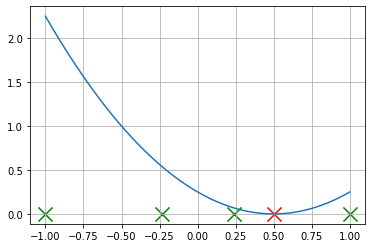

In [ ]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# define a function to find the minimum
def f(x):
    return (x-0.5)**2
 
# find c and d given a and b
def golden_ratio(a, b):
    z = (1 + sqrt(5))/2

    k = (b-a)/2
    x = k - 2*k/(z+1)
    c = (a + b)/2 - x
    d = (a + b)/2 + x
    return c, d

# a and b are the current bounds; the minimum is between them.
def goldenSectionSearch(f, a, b, absolutePrecision):
    c, d = golden_ratio(a, b)
    print("a=", a, "c=", c, "d=", d, "b=", b)

    if abs(a - b) < absolutePrecision:
        return (a + b)/2
 
    # recurrence
    if f(d) < f(c):
        return goldenSectionSearch(f, c, b, absolutePrecision)
    else:
        return goldenSectionSearch(f, a, d, absolutePrecision)

if __name__ == '__main__':
    a = -1.
    b = 1.
    N = 1000
    absolutePrecision = 1e-10
    
    x = goldenSectionSearch(f, a, b, absolutePrecision)
    print("Root = ", x)

    xpoints = np.linspace(a, b, N)
    ypoints = f(xpoints)
    plt.plot(xpoints, ypoints)

    c, d = golden_ratio(a, b)
    plt.scatter(a, 0., marker='x', s=200, color='green') 
    plt.scatter(b, 0., marker='x', s=200, color='green') 
    plt.scatter(c, 0., marker='x', s=200, color='green') 
    plt.scatter(d, 0., marker='x', s=200, color='green') 
    plt.scatter(x, 0., marker='x', s=200, color='red')  # plot the root
    plt.grid()
    plt.show()

In [ ]:
from math import exp,sqrt

# Constants
sigma = 1.0             # Value of sigma in nm
accuracy = 1e-6         # Required accuracy in nm
z = (1+sqrt(5))/2       # Golden ratio

# Function to calculate the Buckingham potential
def f(r):
    return (sigma/r)**6 - exp(-r/sigma)

# Initial positions of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z

# Initial values of the function at the four points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# Main loop of the search process
while x4-x1>accuracy:
    if f2<f3:
        x4,f4 = x3,f3
        x3,f3 = x2,f2
        x2 = x4 - (x4-x1)/z
        f2 = f(x2)
    else:
        x1,f1 = x2,f2
        x2,f2 = x3,f3
        x3 = x1 + (x4-x1)/z
        f3 = f(x3)

# Print the result
print("The minimum falls at",0.5*(x1+x4),"nm")

The minimum falls at 1.630516067174875 nm


# Gradient descent

Local minimum occurs at: 1.9997675322369681
Number of steps: 31


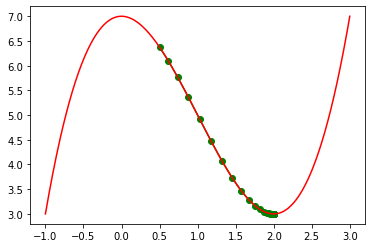

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define the function
def function(x):
    return (x ** 3)-(3 *(x ** 2))+7

# derivative function
def deriv(x):    
    x_deriv = 3* (x**2) - (6 * (x))
    return x_deriv

# gradient descent method
def gradient_descent(x_new, x_prev, precision, l_r, gamma):
    # create empty lists where the updated values of x and y wil be appended during each iteration
    x_list, y_list = [x_new], [function(x_new)]

    # keep looping until your desired precision
    while abs(x_new - x_prev) > precision:    
        x_prev = x_new
        
        # get the derivation of the old value of x
        d_x =  gamma * deriv(x_prev)  
        
        # recalculate x_new
        x_new = x_prev + (l_r * d_x)
        
        # add to the lists
        x_list.append(x_new)
        y_list.append(function(x_new))

    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))
    return x_list, y_list
    
if __name__=="__main__":
    gamma = -1.
    x_init = 0.5
    x_prev = 0.1
    precision = 0.0001
    step = 0.05

    x = np.linspace(-1,3,500)
    y = function(x)
    x_list, y_list = gradient_descent(x_init, x_prev, precision, step, gamma)

    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x, y, c="r")
    plt.show()